In [0]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin


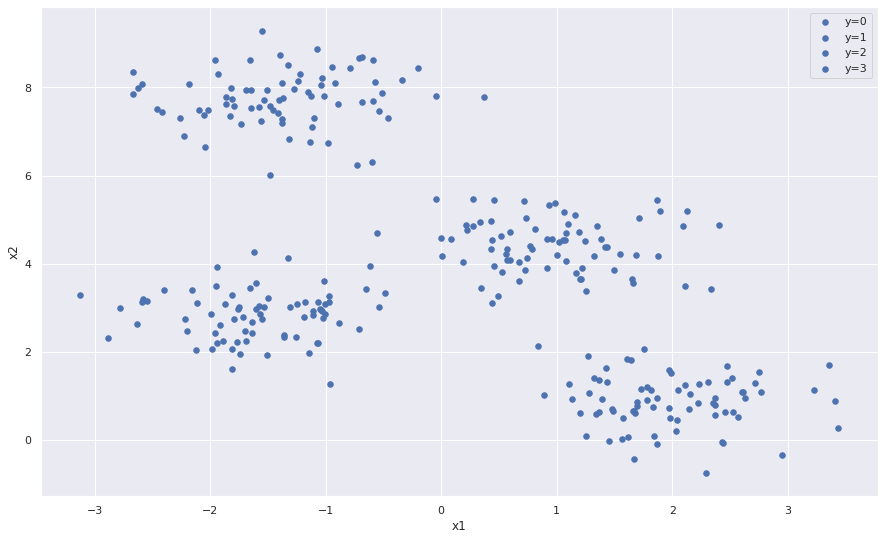

(300, 2)


In [137]:
X, yTrue = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

plt.figure(figsize = (15,9))

idx_0 = np.where(yTrue == 0)
idx_1 = np.where(yTrue == 1)
idx_2 = np.where(yTrue == 2)
idx_3 = np.where(yTrue == 3)

plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='b', marker="o", label="y=0")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o", label="y=1")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='b', marker="o", label="y=2")
plt.scatter(X[idx_3,0], X[idx_3,1], s=30, c='b', marker="o", label="y=3")

plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().legend()

plt.show()

print(X.shape)

In [0]:
def k_means(X, n_clusters, rseed, centreList=[]):

    if len(centreList) == 0:

        r = np.random.RandomState(rseed)
        centreList = r.permutation(X)[:n_clusters]
                
    while True:        

        labelValues = pairwise_distances_argmin(X, centreList)

        newCentreList = np.array([X[labelValues == i].mean(0) for i in range(n_clusters)])
        centreList = newCentreList

        if np.all(centreList != newCentreList):
            centreList = newCentreList
        else: 
            labelValues = pairwise_distances_argmin(X, centreList)
            break

            
    return centreList, labelValues
    



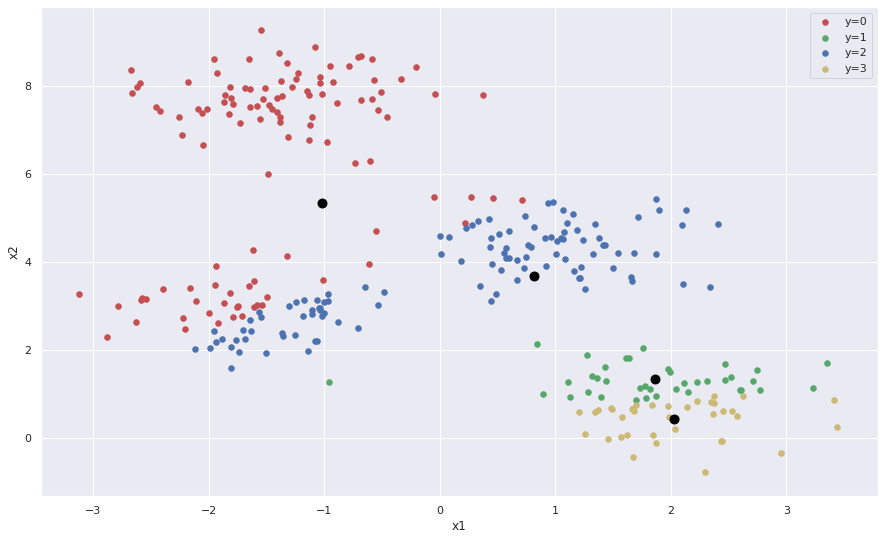

In [139]:
centreList, labelValues = k_means(X,4,0)

plt.figure(figsize = (15,9))

idx_0 = np.where(labelValues == 0)
idx_1 = np.where(labelValues == 1)
idx_2 = np.where(labelValues == 2)
idx_3 = np.where(labelValues == 3)

plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='r', marker="o", label="y=0")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='g', marker="o", label="y=1")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='b', marker="o", label="y=2")
plt.scatter(X[idx_3,0], X[idx_3,1], s=30, c='y', marker="o", label="y=3")

plt.scatter(centreList[0][0],centreList[0][1],s=80,c="0", marker="o")
plt.scatter(centreList[1][0],centreList[1][1],s=80,c="0", marker="o")
plt.scatter(centreList[2][0],centreList[2][1],s=80,c="0", marker="o")
plt.scatter(centreList[3][0],centreList[3][1],s=80,c="0", marker="o")

plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().legend()

plt.show()


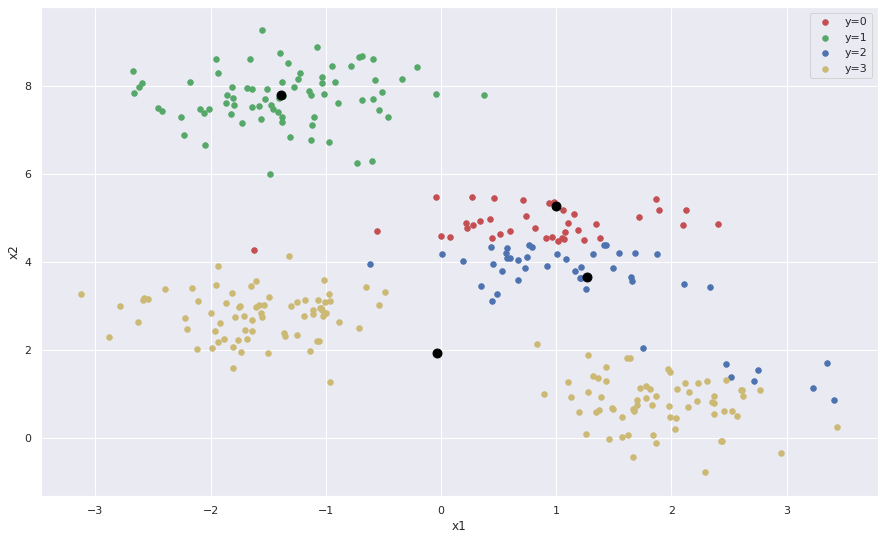

In [140]:
centreList, labelValues = k_means(X,4,2)


plt.figure(figsize = (15,9))

idx_0 = np.where(labelValues == 0)
idx_1 = np.where(labelValues == 1)
idx_2 = np.where(labelValues == 2)
idx_3 = np.where(labelValues == 3)

plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='r', marker="o", label="y=0")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='g', marker="o", label="y=1")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='b', marker="o", label="y=2")
plt.scatter(X[idx_3,0], X[idx_3,1], s=30, c='y', marker="o", label="y=3")

plt.scatter(centreList[0][0],centreList[0][1],s=80,c="0", marker="o")
plt.scatter(centreList[1][0],centreList[1][1],s=80,c="0", marker="o")
plt.scatter(centreList[2][0],centreList[2][1],s=80,c="0", marker="o")
plt.scatter(centreList[3][0],centreList[3][1],s=80,c="0", marker="o")

plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().legend()

plt.show()


**Discussion**: The clustering from Q4 and Q5 appear to be very different as a result of the different randomisation of the initial centers. They did not converge to optimal clusters, which is a common issue found with KMeans clustering. This is remedied by using KMeans++. 


In [0]:
def eucl_dist(a, b, axis=1):
    return np.array([np.min((np.sum((i - (a,b))**2))) for i in X])

def init_center(k,X,rseed):
    r = np.random.RandomState(rseed)
    firstKDataPoint = r.permutation(X.shape[0])[0:1]
    centreList = np.array(X[firstKDataPoint])

    while len(centreList) < k:
        Dj = eucl_dist(centreList[-1][0],centreList[-1][1])
        Pj = (Dj**2)/np.sum(Dj**2)

        randNum = np.random.random()

        for i in range(len(Pj)):
            cum = np.sum(Pj[:i])
            if cum > randNum:
                print(X[i])
                centreList = np.vstack((centreList,X[i]))
                break
    return centreList

In [0]:
def k_meanspp(X, n_clusters,rseed):

    initCentreList = init_center(n_clusters,X,rseed)
    centreList, labelValues = k_means(X,n_clusters,rseed,initCentreList)

    return centreList, labelValues


[2.36960214 0.95071691]
[0.91433877 4.55014643]
[-2.58043836  3.18844294]


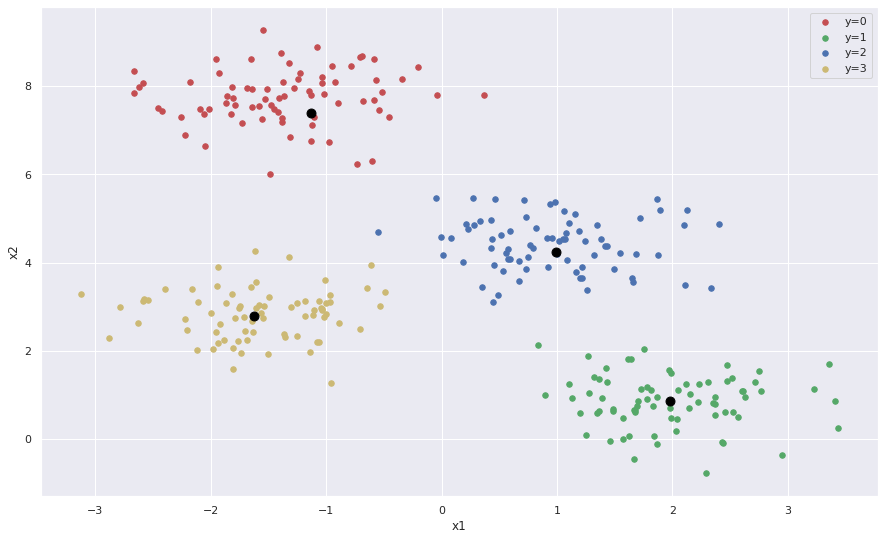

In [143]:
centreList, labelValues = k_meanspp(X,4,2)


plt.figure(figsize = (15,9))

idx_0 = np.where(labelValues == 0)
idx_1 = np.where(labelValues == 1)
idx_2 = np.where(labelValues == 2)
idx_3 = np.where(labelValues == 3)

plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='r', marker="o", label="y=0")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='g', marker="o", label="y=1")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='b', marker="o", label="y=2")
plt.scatter(X[idx_3,0], X[idx_3,1], s=30, c='y', marker="o", label="y=3")

plt.scatter(centreList[0][0],centreList[0][1],s=80,c="0", marker="o")
plt.scatter(centreList[1][0],centreList[1][1],s=80,c="0", marker="o")
plt.scatter(centreList[2][0],centreList[2][1],s=80,c="0", marker="o")
plt.scatter(centreList[3][0],centreList[3][1],s=80,c="0", marker="o")

plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().legend()

plt.show()


[-1.55220688  2.74574995]
[-1.74572014  3.01190457]
[1.65991049 3.56289184]


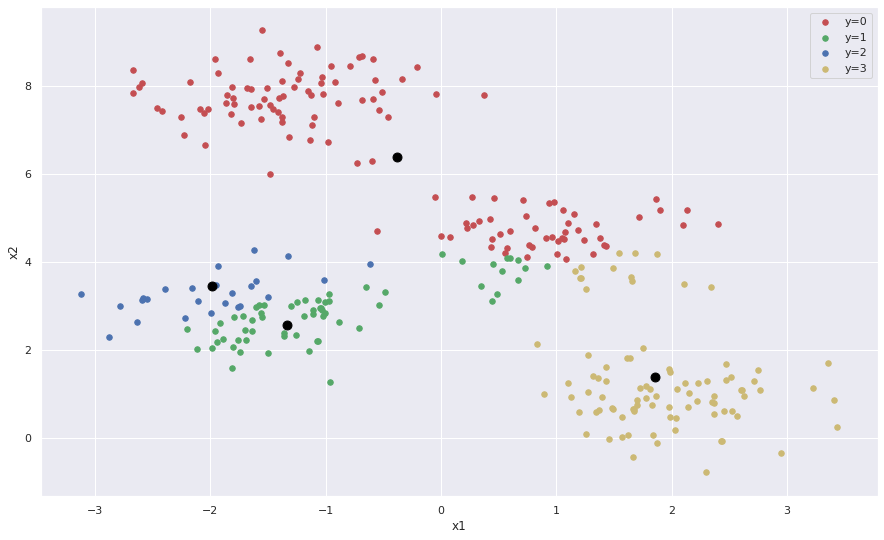

In [144]:
centreList, labelValues = k_meanspp(X,4,0)


plt.figure(figsize = (15,9))

idx_0 = np.where(labelValues == 0)
idx_1 = np.where(labelValues == 1)
idx_2 = np.where(labelValues == 2)
idx_3 = np.where(labelValues == 3)

plt.scatter(X[idx_0,0], X[idx_0,1], s=30, c='r', marker="o", label="y=0")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='g', marker="o", label="y=1")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='b', marker="o", label="y=2")
plt.scatter(X[idx_3,0], X[idx_3,1], s=30, c='y', marker="o", label="y=3")

plt.scatter(centreList[0][0],centreList[0][1],s=80,c="0", marker="o")
plt.scatter(centreList[1][0],centreList[1][1],s=80,c="0", marker="o")
plt.scatter(centreList[2][0],centreList[2][1],s=80,c="0", marker="o")
plt.scatter(centreList[3][0],centreList[3][1],s=80,c="0", marker="o")

plt.xlabel("x1")
plt.ylabel("x2")

plt.gca().legend()

plt.show()


**Discussion**: The clustering from Q8 and Q9 appear to be the same as a result of the fact that the initial centers were randomly generated in such a way that they were more likely to be placed further away from one another. In both the cases where rSeed = 0 and rSeed = 2, KMeans++ has found an optimal clustering for the data points. 

In comparing the results generated from KMeans and KMeans++, one can draw the conclusion that KMeans++ is not dependent on the initial location of the centers, whereas KMeans is. This is why KMeans++ is more optimal, in addition to the fact that creating centres that are further apart leads to more stable results. 
